In [1]:
import pandas as pd
import matplotlib 
import geopandas as gpd
import contextily as ctx


/var/folders/p5/ck_2rv1n3rn6dwp8yldw0z7w0000gn/T/ipykernel_1371/1604330008.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/aaronjoju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
world_gdf = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

world_gdf

/var/folders/p5/ck_2rv1n3rn6dwp8yldw0z7w0000gn/T/ipykernel_1371/1851984207.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
world_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
world_gdf['pop_density'] = world_gdf.pop_est / world_gdf.area * 10 **6

world_gdf.sort_values(by='pop_density',ascending=False)

/var/folders/p5/ck_2rv1n3rn6dwp8yldw0z7w0000gn/T/ipykernel_1371/941136759.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_gdf['pop_density'] = world_gdf.pop_est / world_gdf.area * 10 **6


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",1.375084e+13
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",9.754682e+12
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",7.744572e+12
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",6.968534e+12
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.647863e+12
...,...,...,...,...,...,...,...
144,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",1.756569e+10
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",1.596242e+09
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",9.770204e+07
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",8.298776e+07


<Axes: >

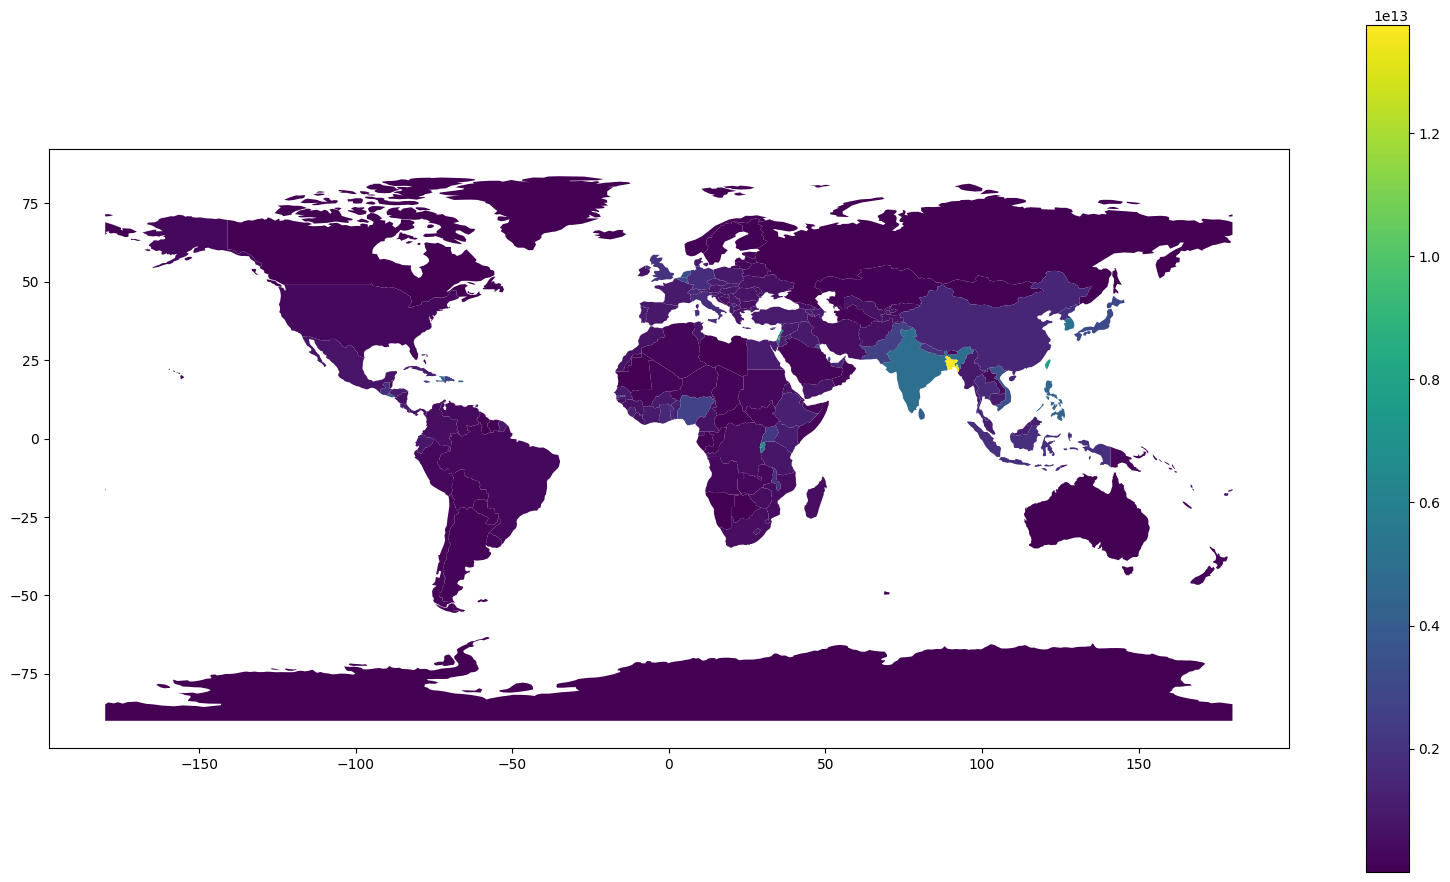

In [5]:
figsize = (20,11)

world_gdf.plot('pop_density',legend = True,figsize=figsize)

<Axes: >

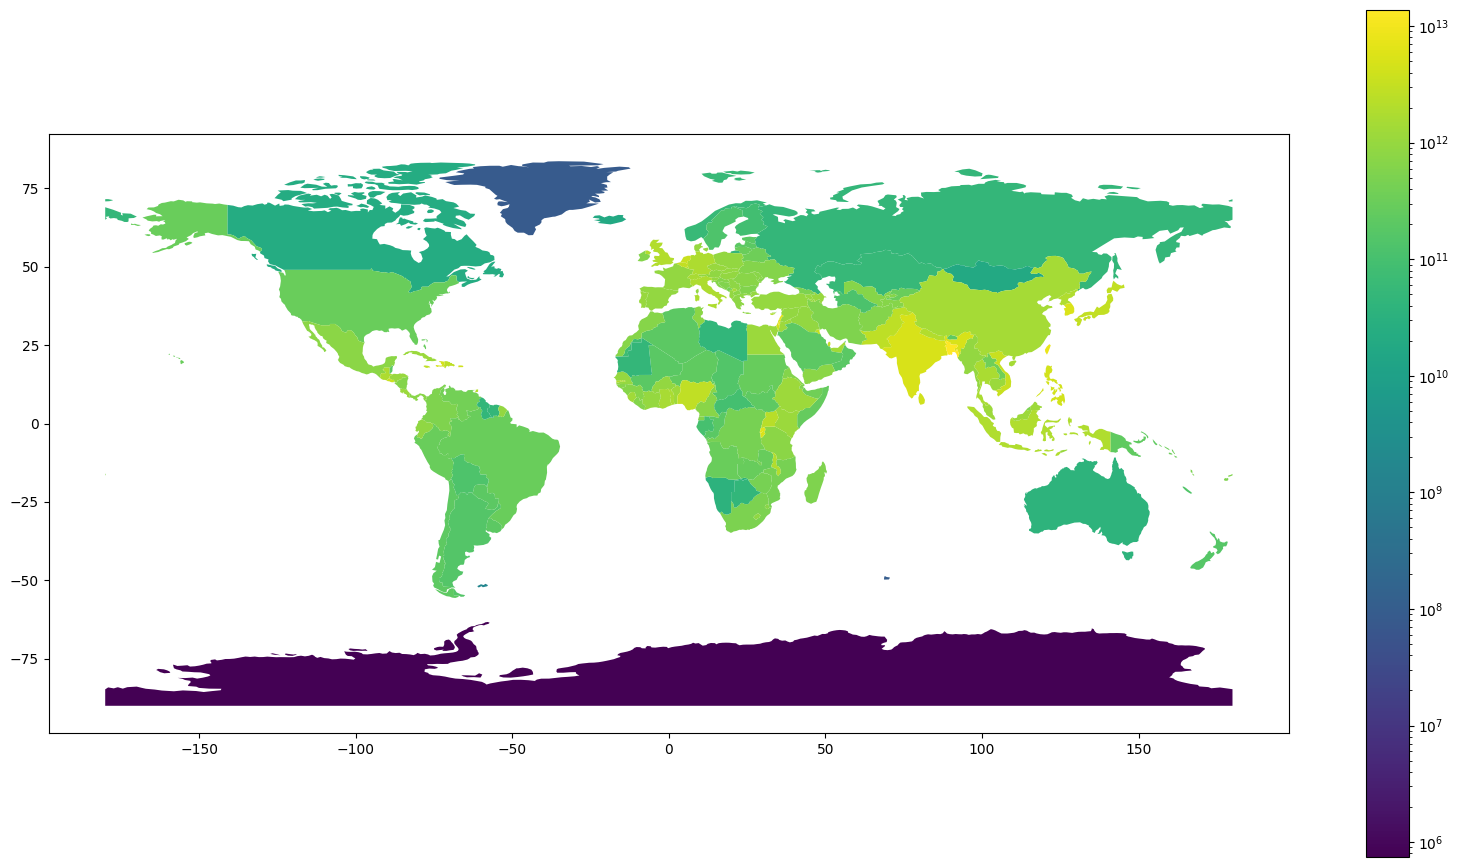

In [6]:
norm  = matplotlib.colors.LogNorm(vmin = world_gdf.pop_density.min(),vmax=world_gdf.pop_density.max())

world_gdf.to_crs('epsg:4326').plot("pop_density",
                                   figsize=figsize,
                                   legend=True,
                                   norm=norm)

In [7]:
deaths_df = gpd.read_file('/Users/aaronjoju/Downloads/SnowGIS/Cholera_Deaths.shp')
pumps_df = gpd.read_file('/Users/aaronjoju/Downloads/SnowGIS/Pumps.shp')

<Axes: >

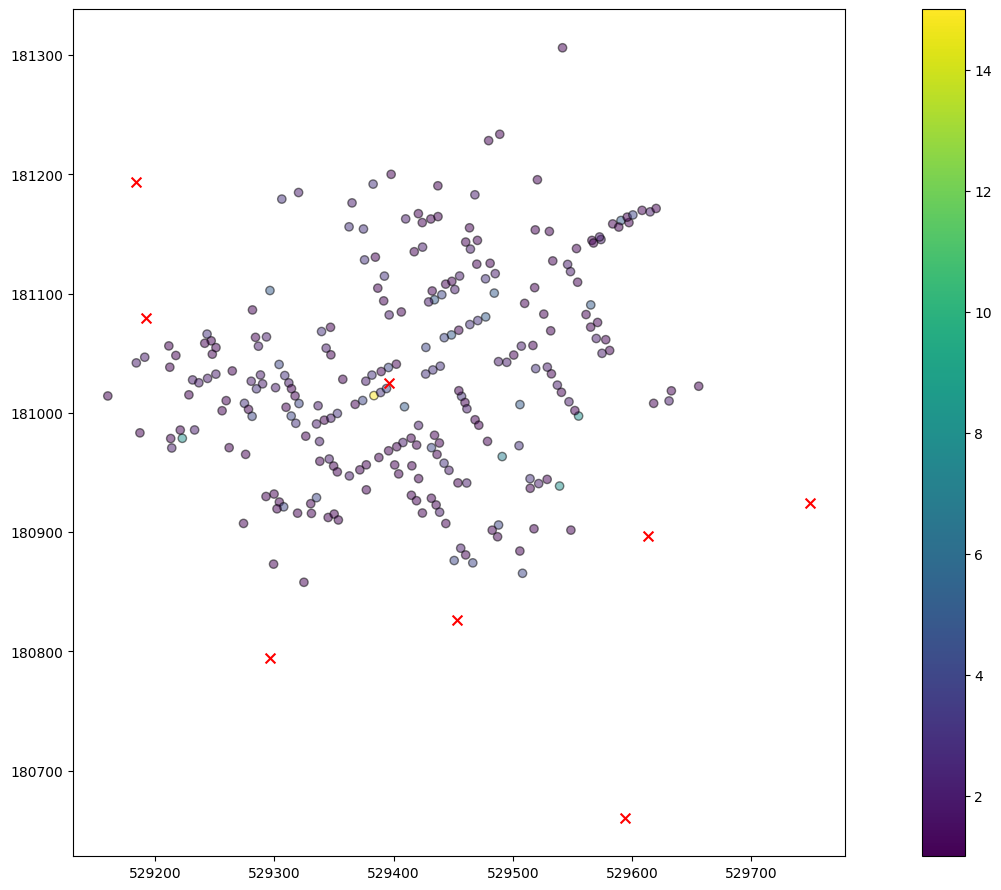

In [8]:
ax = deaths_df.plot(column='Count',alpha=0.5,edgecolor='k',legend=True,figsize=figsize)
pumps_df.plot(ax=ax,marker='x',color='red',markersize=50)

In [9]:
ctx.add_basemap( ax=ax,crs=deaths_df.crs.to_string(),source='/Users/aaronjoju/Downloads/SnowGIS/SnowMap.tif')

In [10]:
state_df = gpd.read_file('/Users/aaronjoju/Documents/AdvancePython/Unit2/State.shp')

DriverError: Unable to open /Users/aaronjoju/Documents/AdvancePython/Unit2/State.shx or /Users/aaronjoju/Documents/AdvancePython/Unit2/State.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [ ]:
df = pd.read_csv("Karnataka-DistPop1.csv")
df.head()

NameError: name 'pd' is not defined